In [68]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [130]:
ds_ctl = xr.open_dataset("/work/aaron900129/taiesm_work/archive/entrainment_control_Aaron/atm/hist/entrainment_control.cam.h0.0001-01.nc")
ds_mod = xr.open_dataset("/work/aaron900129/taiesm_work/archive/entrainment_Aaron/atm/hist/entrainment.cam.h0.0001-01.nc")

tmq_ctl = np.asarray(ds_ctl['TMQ'][0])
tmq_mod = np.asarray(ds_mod['TMQ'][0])
tmq_diff = tmq_mod - tmq_ctl

lon, lat = np.asarray(ds_ctl['lon']), np.asarray(ds_ctl['lat'])

In [70]:
# draw filled contours.
clevs = np.arange(5, 55+5, 5)
cmap_data = ['#F0F9C7', '#D7FDD1', '#ADEDB7', '#6FBAA0', '#55A396', '#4E94B1', '#2C6FAB', '#1E5087', '#052390', '#270743']
cmap = mcolors.ListedColormap(cmap_data, 'TMQ')
cmap.set_under('#FFFFFF')
cmap.set_over('#623058')

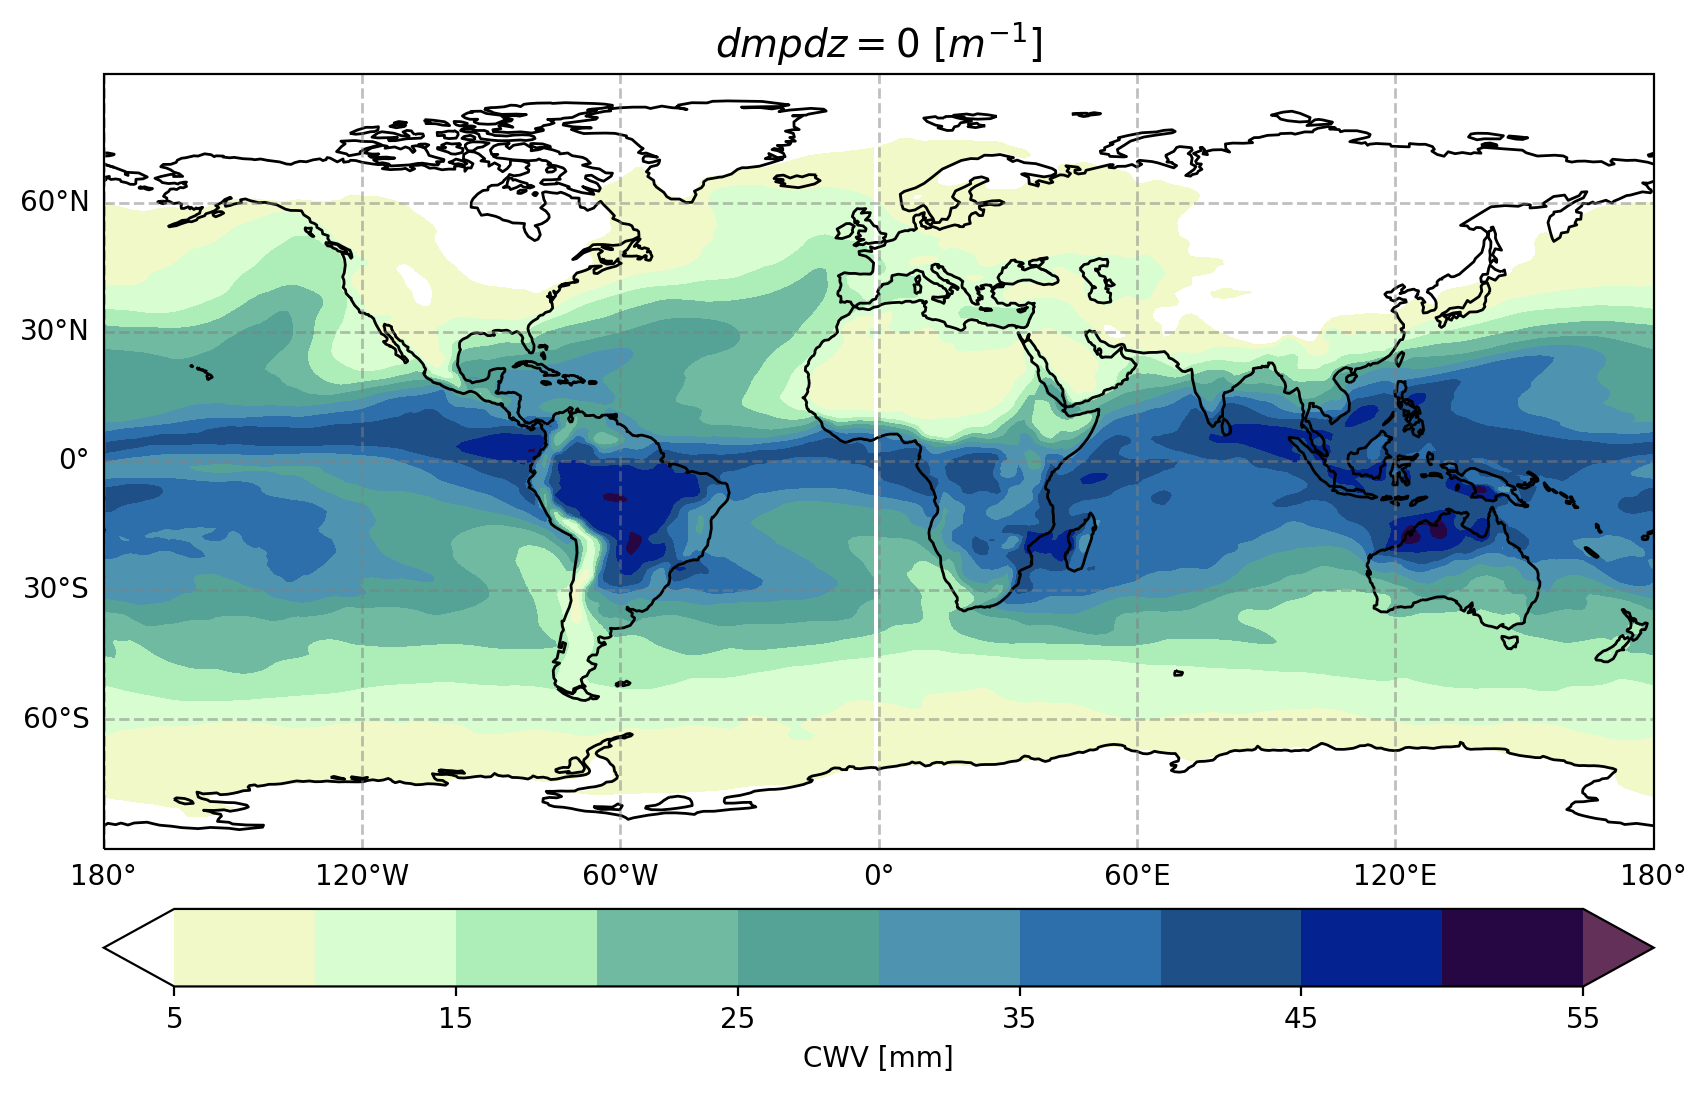

In [71]:
plt.figure(figsize=(10, 8), dpi=200)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
cf = ax.contourf(lon, lat, tmq_mod, cmap=cmap, levels=np.arange(5, 55+5, 5), extend='both')
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


plt.colorbar(cf, orientation='horizontal', pad=0.05, fraction=0.1, extend='both', label='CWV [mm]')
plt.title(r"$dmpdz = 0\ [m^{-1}]$", fontsize=14)
plt.savefig("../graphs/dmpdz_0.png", dpi=200)
# plt.show()


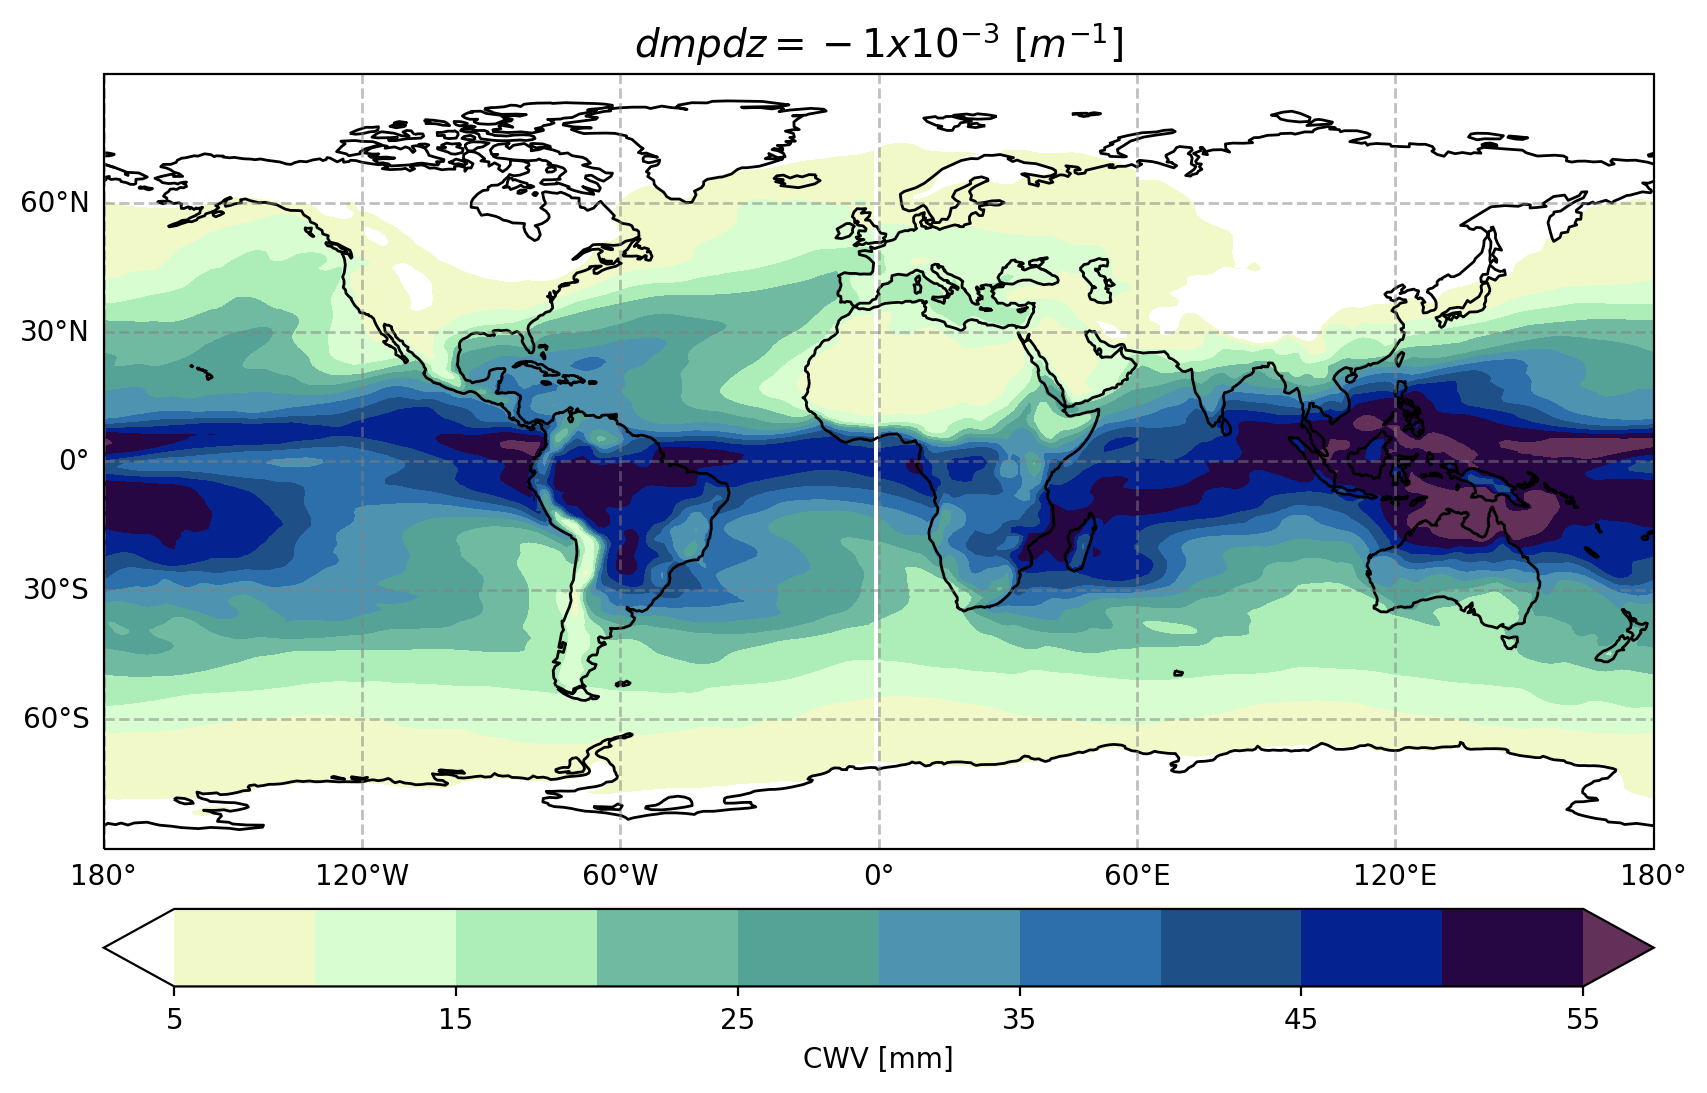

In [72]:
plt.figure(figsize=(10, 8), dpi=200)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
cf = ax.contourf(lon, lat, tmq_ctl, cmap=cmap, levels=np.arange(5, 55+5, 5), extend='both')
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


plt.colorbar(cf, orientation='horizontal', pad=0.05, fraction=0.1, extend='both', label='CWV [mm]')


plt.title(r"$dmpdz = -1x10^{-3}\ [m^{-1}]$", fontsize=14)
plt.savefig("../graphs/dmpdz_-1e-3.png", dpi=200)
# plt.show()


In [103]:
# draw filled contours.
clevs = [-18, -15, -12, -9, -6, -3, -1, 1, 3, 6, 9, 12, 15, 18]
cmap_data = ['#816234', '#AE8E4F', '#DAB96A', '#DCD27C', '#CBE189', '#C9EEA1', '#E4F7D0', '#FFFFFF', '#9FC4F3', '#458BE9', '#1F58D6', '#162ABF', '#1815A6', '#112289', '#12336D']
# cmap_data = ['#AE8E4F', '#DAB96A', '#DCD27C', '#CBE189', '#C9EEA1', '#E4F7D0', '#FFFFFF', '#9FC4F3', '#458BE9', '#1F58D6', '#162ABF', '#1815A6', '#112289']
cmap = mcolors.ListedColormap(cmap_data, 'TMQ')
# cmap.set_under('#816234')
# cmap.set_over('#12336D')

cmap = mcolors.ListedColormap(cmap_data, 'diff')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

In [140]:
np.linspace(-18, 18, 16)

array([-18. , -15.6, -13.2, -10.8,  -8.4,  -6. ,  -3.6,  -1.2,   1.2,
         3.6,   6. ,   8.4,  10.8,  13.2,  15.6,  18. ])

/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


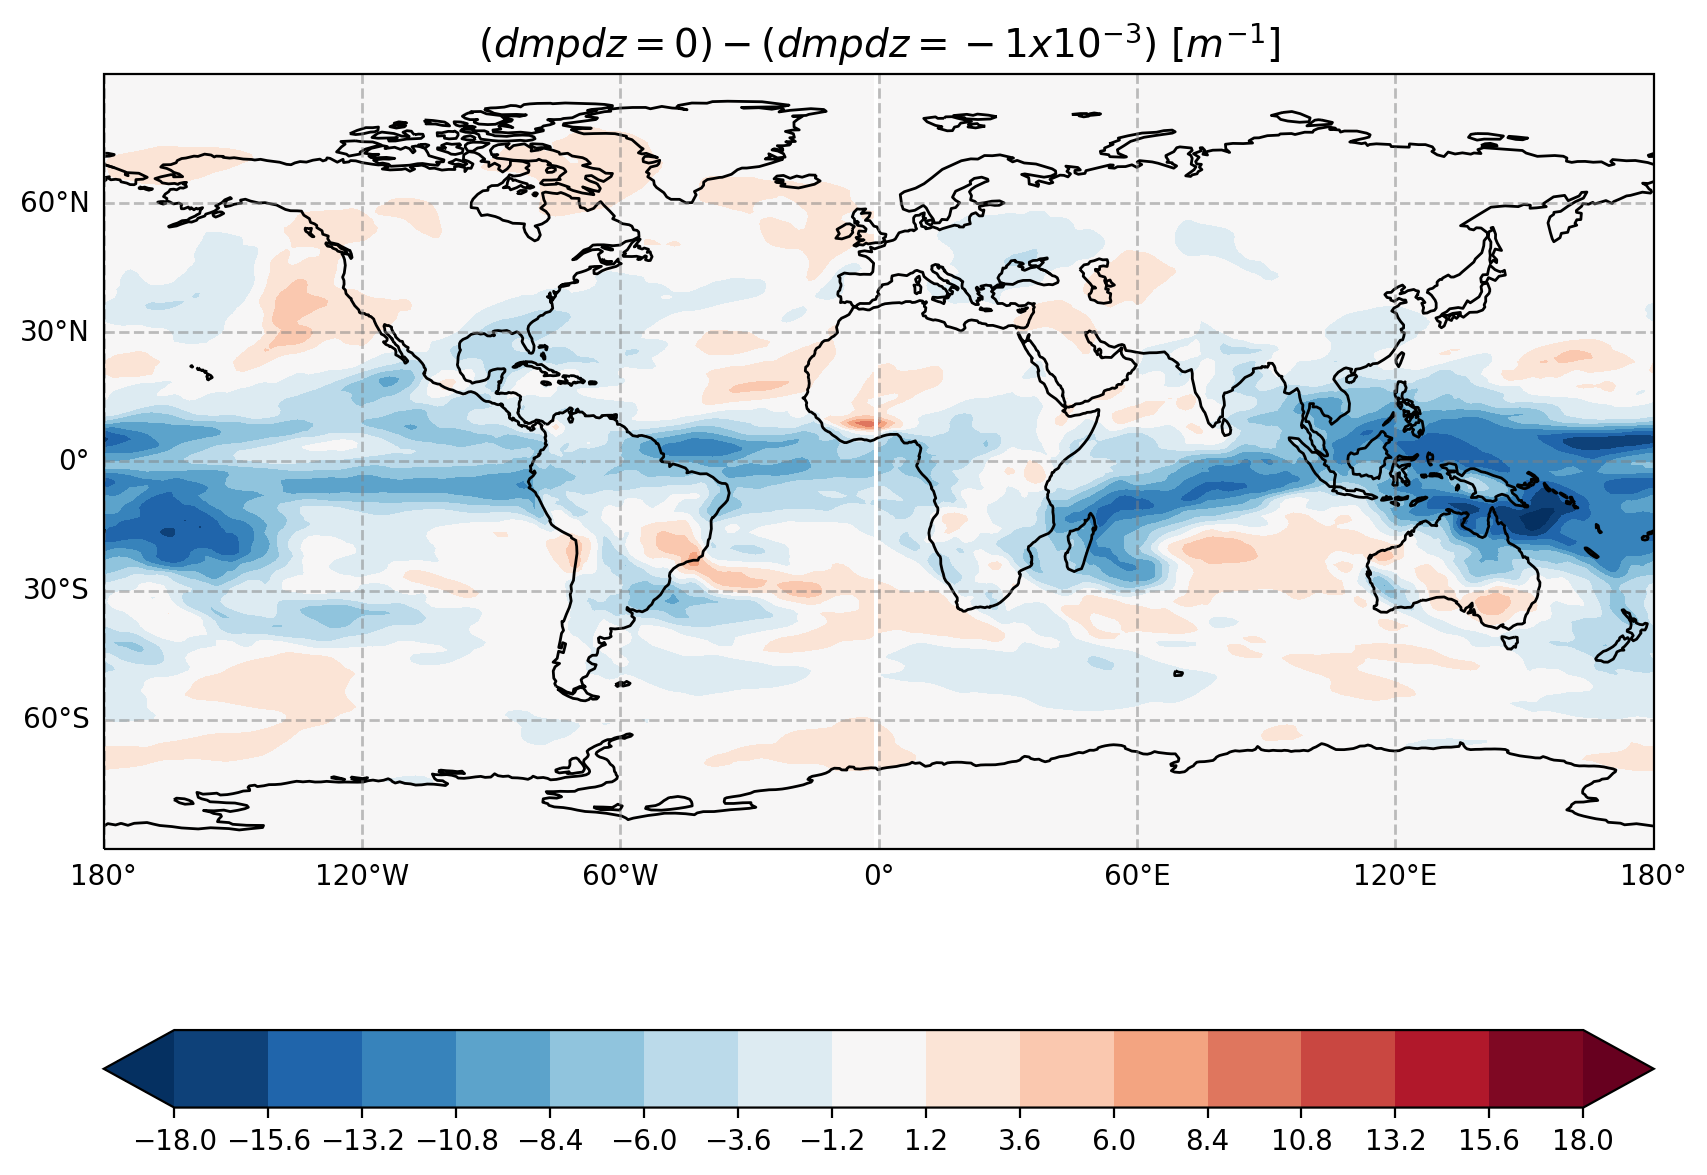

In [143]:
plt.figure(figsize=(10, 8), dpi=200)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
cf = ax.contourf(lon, lat, tmq_diff, cmap=cm.RdBu_r, levels=np.linspace(-18, 18, 16), extend='both')
plt.colorbar(cf, orientation='horizontal', ticks=np.linspace(-18, 18, 16))


ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

plt.title(r"$(dmpdz = 0) - (dmpdz = -1x10^{-3})\ [m^{-1}]$", fontsize=14)
plt.savefig("../graphs/diff.png", dpi=200)
# plt.show()
